# 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
import geopandas as gpd

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn-whitegrid')
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 사용을 위해서 세팅
pd.set_option('max_columns', 80) # 최대 컬럼 갯수 지정
pd.set_option('max_rows', 80) # 최대 로우 갯수 지정

# 데이터 로드

In [2]:
store = pd.read_csv('..\서울시 우리마을가게 상권분석서비스(상권-추정매출).csv', encoding='cp949')
store.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,5836078,92,31,69,0,5,11,0,15,24,45,0,0,29,50,22,0,29,71,0,18,68,6,4,4,1810229,4025849,0,284199,642625,0,883405,1375865,2649984,0,0,1663339,2898620,1274119,0,1468511,3540306,0,906549,3395273,284199,208534,214263,33,59,0,5,10,0,18,23,36,0,0,15,59,18,0,14,74,0,27,42,5,5,9,8


In [3]:
area = pd.read_csv('..\서울시 우리마을가게 상권분석서비스(상권영역).csv', encoding='cp949')
area.head(1)

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,201810,R,전통시장,1001453,낙성대시장,196121,442084,11620,11620585,NaN


# 서비스 업종 코드명 카테고리화
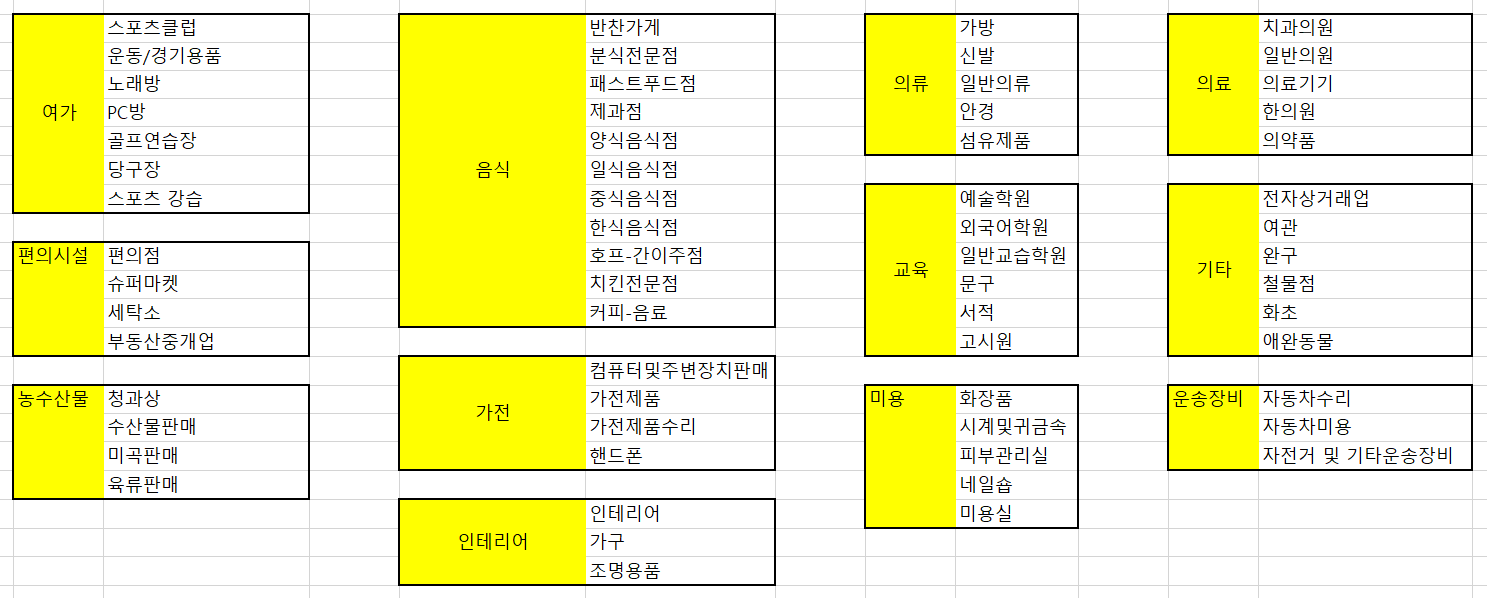


In [4]:
def service_recategorization(x):
    if x == '스포츠클럽' or x == '운동/경기용품' or x == '노래방' or x == 'PC방' or x == '골프연습장' or x == '당구장' or x == '스포츠 강습':
        return '여가'
    elif x == '편의점' or x == '슈퍼마켓' or x == '세탁소' or x == '부동산중개업':
        return '편의시설'
    elif x == '청과상' or x == '수산물판매' or x == '미곡판매' or x == '육류판매':
        return '농수산물'
    elif x == '자동차수리' or x == '자동차미용' or x == '자전거 및 기타운송장비':
        return '운송장비'
    elif x == '컴퓨터및주변장치판매' or x == '가전제품' or x == '가전제품수리' or x == '핸드폰':
        return '가전'
    elif x == '가방' or x == '신발' or x == '일반의류' or x == '안경' or x == '섬유제품':
        return '의류'
    elif x == '예술학원' or x == '외국어학원' or x == '일반교습학원' or x == '문구' or x == '서적' or x == '고시원' :
        return '교육'
    elif x == '화장품' or x == '시계및귀금속' or x == '피부관리실' or x == '네일숍' or x == '미용실':
        return '미용'
    elif x == '치과의원' or x == '일반의원' or x == '의료기기' or x == '한의원' or x == '의약품':
        return '의료'
    elif x == '전자상거래업' or x == '여관' or x == '완구' or x == '철물점' or x == '화초' or x == '애완동물':
        return '기타'
    else:
        return '음식'

In [5]:
store['서비스_업종_코드_명']= store['서비스_업종_코드_명'].apply(service_recategorization)
store['서비스_업종_코드_명'].unique()

array(['기타', '음식', '가전', '의류', '여가', '미용', '교육', '의료', '편의시설', '농수산물',
       '운송장비'], dtype=object)

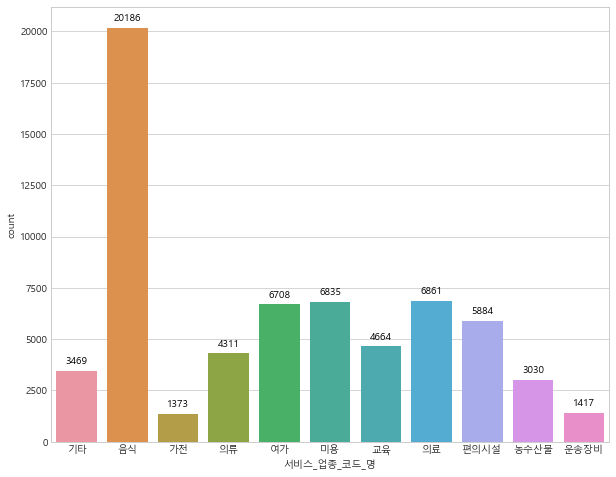

In [6]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='서비스_업종_코드_명', data=store);

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points');

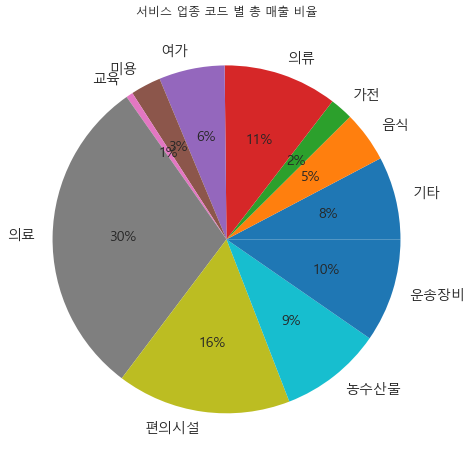

In [7]:
revenue = store.groupby(['서비스_업종_코드_명'])['분기당_매출_금액'].sum()
name = store['서비스_업종_코드_명'].unique()

plt.figure(figsize=(10, 8))
plt.pie(revenue, labels=name, autopct='%.0f%%', textprops={'size':14})
plt.title('서비스 업종 코드 별 총 매출 비율');

# 상권코드별 새로운 테이블 변환
## 상권코드 1496개로 통일화

In [8]:
# 1496개의 상권코드를 가지고 있는 파일 로드
store_code = gpd.read_file('./승순이형 작업파일들/상권_geometry_좌표.geojson')

# int화 시켜줌
store_code['TRDAR_CD']=store_code['TRDAR_CD'].astype('int')

# store에 있는 상권코드의 수가 store_code보다 작으므로 outer조인화
store = pd.merge(store, store_code.set_index(['TRDAR_CD']), left_on=['상권_코드'], right_index=True, how='outer')

# 결측치 0으로 환원
store.fillna(0, inplace=True)

# 기준분기코드가 1.0, 2.0으로 나오는걸 정수화
store['기준_분기_코드'] = store['기준_분기_코드'].astype(int)

# merge 시 기준분기코드의 불필요한 0을 제거
store = store[store['기준_분기_코드'] != 0]

store.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,TRDAR_SE_C,TRDAR_SE_1,TRDAR_CD_N,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,ADSTRD_CD,STDR_YM_CD,area,perimeter,x,y,geometry
0.0,2021.0,2,U,관광특구,1001496,강남 마이스 관광특구,CS300043,기타,5.836078e+06,92.0,31.0,69.0,0.0,5.0,11.0,0.0,15.0,24.0,45.0,0.0,0.0,29.0,50.0,22.0,0.0,29.0,71.0,0.0,18.0,68.0,6.0,4.0,4.0,1.810229e+06,4.025849e+06,0.000000e+00,2.841990e+05,642625.0,0.000000e+00,8.834050e+05,...,2.841990e+05,2.085340e+05,2.142630e+05,33.0,59.0,0.0,5.0,10.0,0.0,18.0,23.0,36.0,0.0,0.0,15.0,59.0,18.0,0.0,14.0,74.0,0.0,27.0,42.0,5.0,5.0,9.0,8.0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,201810,190428.278168,1837.68266,127.060063,37.511,"MULTIPOLYGON (((127.06028 37.51390, 127.06040 ..."
1.0,2021.0,2,U,관광특구,1001496,강남 마이스 관광특구,CS300035,음식,8.612036e+07,739.0,100.0,0.0,0.0,14.0,0.0,0.0,86.0,0.0,0.0,0.0,0.0,86.0,0.0,14.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,8.612036e+07,0.000000e+00,0.000000e+00,1.219730e+07,0.0,0.000000e+00,7.392306e+07,...,1.219730e+07,0.000000e+00,0.000000e+00,739.0,0.0,0.0,369.0,0.0,0.0,370.0,0.0,0.0,0.0,0.0,369.0,0.0,370.0,0.0,370.0,0.0,0.0,0.0,0.0,370.0,0.0,0.0,4.0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,201810,190428.278168,1837.68266,127.060063,37.511,"MULTIPOLYGON (((127.06028 37.51390, 127.06040 ..."
2.0,2021.0,2,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전,1.829845e+09,8110.0,60.0,40.0,9.0,9.0,8.0,21.0,13.0,19.0,22.0,0.0,2.0,34.0,24.0,40.0,0.0,54.0,47.0,0.0,18.0,26.0,25.0,23.0,7.0,1.093828e+09,7.360177e+08,1.607820e+08,1.700264e+08,143456942.0,3.766504e+08,2.429118e+08,...,4.270654e+08,3.913028e+08,1.233766e+08,5251.0,2859.0,796.0,844.0,960.0,1528.0,1123.0,1801.0,1058.0,0.0,108.0,1987.0,2277.0,3648.0,90.0,4012.0,3729.0,84.0,1750.0,2096.0,1986.0,882.0,943.0,8.0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,201810,190428.278168,1837.68266,127.060063,37.511,"MULTIPOLYGON (((127.06028 37.51390, 127.06040 ..."
3.0,2021.0,2,U,관광특구,1001496,강남 마이스 관광특구,CS300031,음식,1.101960e+10,5852.0,58.0,42.0,13.0,13.0,9.0,13.0,10.0,20.0,22.0,0.0,9.0,31.0,44.0,17.0,0.0,43.0,57.0,0.0,2.0,10.0,21.0,33.0,34.0,6.413211e+09,4.606389e+09,1.373595e+09,1.463422e+09,961815561.0,1.464247e+09,1.150132e+09,...,2.296227e+09,3.635186e+09,3.709714e+09,3308.0,2544.0,709.0,709.0,547.0,612.0,731.0,1266.0,1278.0,0.0,396.0,1798.0,2530.0,1128.0,0.0,2419.0,3433.0,0.0,97.0,544.0,1274.0,1655.0,2282.0,6.0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,201810,190428.278168,1837.68266,127.060063,37.511,"MULTIPOLYGON (((127.06028 37.51390, 127.06040 ..."
4.0,2021.0,2,U,관광특구,1001496,강남 마이스 관광특구,CS300028,기타,1.026839e+09,22212.0,68.0,32.0,9.0,11.0,9.0,9.0,31.0,24.0,9.0,0.0,2.0,23.0,39.0,34.0,2.0,48.0,53.0,0.0,23.0,31.0,20.0,13.0,13.0,6.960597e+08,3.307797e+08,8.813079e+07,1.128655e+08,89421927.0,8.970838e+07,3.159331e+08,...,1.560664e+08,9.958523e+07,1.059389e+08,16255.0,5957.0,1598.0,2261.0,2423.0,2157.0,7816.0,3679.0,2278.0,0.0,1474.0,4689.0,5459.0,10005.0,585.0,8998.0,12018.0,36.0,6420.0,7344.0,3521.0,2384.0,1311.0,6.0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,201810,190428.278168,1837.68266,127.060063,37.511,"MULTIPOLYGON (((127.06028 37.51390, 127.06040 ..."


## 상권코드와 기준분기코드를 index

In [9]:
# merge를 할 새로운 테이블 생성
new_table = pd.DataFrame()

# 분기당 매출 금액을 기준으로 비율을 구하는 함수
def make_ratio(df, col):
    quarter_ratio_column_revenue = df.groupby(['상권_코드','기준_분기_코드'])[col].sum()
    quarter_ratio_revenue = df.groupby(['상권_코드','기준_분기_코드'])['분기당_매출_금액'].sum()
    tmp_df = (quarter_ratio_column_revenue / quarter_ratio_revenue).to_frame()
    col = col.replace('_', ' ') # column의 이름에서 _를 띄어쓰기로 변환
    tmp_df.columns = [col]
    
    return tmp_df

In [10]:
# 여성 총매출 비율
female = make_ratio(store, '여성_매출_금액')
new_table = female
new_table

여성 매출 금액
상권_코드   기준_분기_코드          
1000001 1         0.567886
        2         0.585425
1000002 1         0.578683
        2         0.639484
1000003 1         0.386436
...                    ...
1001494 2         0.381583
1001495 1         0.499479
        2         0.537323
1001496 1         0.574233
        2         0.593901

[2972 rows x 1 columns]

In [11]:
# 남성 총매출 비율
male = make_ratio(store, '남성_매출_금액')
new_table = pd.merge(new_table, male, right_index=True, left_index=True)
new_table

여성 매출 금액  남성 매출 금액
상권_코드   기준_분기_코드                    
1000001 1         0.567886  0.329257
        2         0.585425  0.303938
1000002 1         0.578683  0.407471
        2         0.639484  0.353526
1000003 1         0.386436  0.511372
...                    ...       ...
1001494 2         0.381583  0.473263
1001495 1         0.499479  0.436466
        2         0.537323  0.415084
1001496 1         0.574233  0.357528
        2         0.593901  0.339985

[2972 rows x 2 columns]

In [12]:
# 연령대별 총매출 비율
ages = ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액','연령대_40_매출_금액','연령대_50_매출_금액', '연령대_60_이상_매출_금액']
for age in ages:
    age = make_ratio(store, age)
    new_table = pd.merge(new_table, age, right_index=True, left_index=True)
    
new_table

여성 매출 금액  남성 매출 금액  연령대 10 매출 금액  연령대 20 매출 금액  \
상권_코드   기준_분기_코드                                                   
1000001 1         0.567886  0.329257      0.006921      0.180985   
        2         0.585425  0.303938      0.008499      0.185540   
1000002 1         0.578683  0.407471      0.002219      0.122634   
        2         0.639484  0.353526      0.002208      0.107609   
1000003 1         0.386436  0.511372      0.001972      0.216906   
...                    ...       ...           ...           ...   
1001494 2         0.381583  0.473263      0.001707      0.097895   
1001495 1         0.499479  0.436466      0.005461      0.219697   
        2         0.537323  0.415084      0.006240      0.228960   
1001496 1         0.574233  0.357528      0.005104      0.182462   
        2         0.593901  0.339985      0.005626      0.188337   

                  연령대 30 매출 금액  연령대 40 매출 금액  연령대 50 매출 금액  연령대 60 이상 매출 금액  
상권_코드   기준_분기_코드                                                             
1000001 1             0.198078      0.198989      0.161625         0.150544  
        2             0.229166      0.199314      0.153722         0.113122  
1000002 1             0.178571      0.200006      0.249588         0.233137  
        2             0.140956      0.219398      0.282353         0.240485  
1000003 1             0.291503      0.159254      0.132897         0.095275  
...                        ...           ...           ...              ...  
1001494 2             0.134678      0.208997      0.195597         0.215970  
1001495 1             0.282094      0.181922      0.153211         0.093588  
        2             0.311147      0.182580      0.133446         0.090034  
1001496 1             0.271541      0.223700      0.146888         0.102066  
        2             0.280428      0.213512      0.148956         0.097028  

[2972 rows x 8 columns]

In [13]:
# 시간대별 총매출 비율
time_for_prepro = store[['상권_코드', '기준_년_코드', '기준_분기_코드', '분기당_매출_금액','시간대_00~06_매출_비율','시간대_06~11_매출_비율', 
                         '시간대_11~14_매출_비율', '시간대_14~17_매출_비율','시간대_17~21_매출_비율', '시간대_21~24_매출_비율']]

# 비율 소수점 화
times = ['시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율','시간대_17~21_매출_비율', '시간대_21~24_매출_비율']
for time in times:
    time_for_prepro[time] = time_for_prepro[time] * 0.01

# 시간대별 총매출액 (시간대별은 건수와 비율밖에 존재하지 않음)
times_revenue = ['시간대_00~06_매출액', '시간대_06~11_매출액', '시간대_11~14_매출액', '시간대_14~17_매출액', '시간대_17~21_매출액', '시간대_21~24_매출액']
for time_revenue, time in zip(times_revenue, times):
    time_for_prepro[time_revenue] = list(map(int,(time_for_prepro.loc[:,time] * time_for_prepro.loc[:,'분기당_매출_금액'])))
    time_for_prepro=time_for_prepro.drop(time, axis=1)

# 계산된 시간대별 총매출액을 기준으로 총매출액 비율 계산
for time_revenue in times_revenue:
    time_revenue = make_ratio(time_for_prepro, time_revenue)
    new_table = pd.merge(new_table, time_revenue, right_index=True, left_index=True)

new_table.head()

여성 매출 금액  남성 매출 금액  연령대 10 매출 금액  연령대 20 매출 금액  \
상권_코드   기준_분기_코드                                                   
1000001 1         0.567886  0.329257      0.006921      0.180985   
        2         0.585425  0.303938      0.008499      0.185540   
1000002 1         0.578683  0.407471      0.002219      0.122634   
        2         0.639484  0.353526      0.002208      0.107609   
1000003 1         0.386436  0.511372      0.001972      0.216906   

                  연령대 30 매출 금액  연령대 40 매출 금액  연령대 50 매출 금액  연령대 60 이상 매출 금액  \
상권_코드   기준_분기_코드                                                              
1000001 1             0.198078      0.198989      0.161625         0.150544   
        2             0.229166      0.199314      0.153722         0.113122   
1000002 1             0.178571      0.200006      0.249588         0.233137   
        2             0.140956      0.219398      0.282353         0.240485   
1000003 1             0.291503      0.159254      0.132897         0.095275   

                  시간대 00~06 매출액  시간대 06~11 매출액  시간대 11~14 매출액  시간대 14~17 매출액  \
상권_코드   기준_분기_코드                                                               
1000001 1              0.008353       0.068399       0.303365       0.303549   
        2              0.005570       0.061529       0.325921       0.285469   
1000002 1              0.018030       0.060306       0.272554       0.357113   
        2              0.012586       0.061937       0.281284       0.342988   
1000003 1              0.017124       0.048608       0.253126       0.358296   

                  시간대 17~21 매출액  시간대 21~24 매출액  
상권_코드   기준_분기_코드                                
1000001 1              0.275303       0.045415  
        2              0.278418       0.043466  
1000002 1              0.242619       0.048048  
        2              0.272574       0.037734  
1000003 1              0.265619       0.059849

In [14]:
# 연령대별 총매출 비율
total_categoiesy_revenue = store.groupby(['상권_코드', '기준_분기_코드', '서비스_업종_코드_명'])['분기당_매출_금액'].sum()
quarter_ratio_revenue = store.groupby(['상권_코드','기준_분기_코드'])['분기당_매출_금액'].sum()
tmp_df = (total_categoiesy_revenue / quarter_ratio_revenue).unstack(level=-1)
new_table = pd.merge(new_table, tmp_df, right_index=True, left_index=True)
new_table

여성 매출 금액  남성 매출 금액  연령대 10 매출 금액  연령대 20 매출 금액  \
상권_코드   기준_분기_코드                                                   
1000001 1         0.567886  0.329257      0.006921      0.180985   
        2         0.585425  0.303938      0.008499      0.185540   
1000002 1         0.578683  0.407471      0.002219      0.122634   
        2         0.639484  0.353526      0.002208      0.107609   
1000003 1         0.386436  0.511372      0.001972      0.216906   
...                    ...       ...           ...           ...   
1001494 2         0.381583  0.473263      0.001707      0.097895   
1001495 1         0.499479  0.436466      0.005461      0.219697   
        2         0.537323  0.415084      0.006240      0.228960   
1001496 1         0.574233  0.357528      0.005104      0.182462   
        2         0.593901  0.339985      0.005626      0.188337   

                  연령대 30 매출 금액  연령대 40 매출 금액  연령대 50 매출 금액  연령대 60 이상 매출 금액  \
상권_코드   기준_분기_코드                                                              
1000001 1             0.198078      0.198989      0.161625         0.150544   
        2             0.229166      0.199314      0.153722         0.113122   
1000002 1             0.178571      0.200006      0.249588         0.233137   
        2             0.140956      0.219398      0.282353         0.240485   
1000003 1             0.291503      0.159254      0.132897         0.095275   
...                        ...           ...           ...              ...   
1001494 2             0.134678      0.208997      0.195597         0.215970   
1001495 1             0.282094      0.181922      0.153211         0.093588   
        2             0.311147      0.182580      0.133446         0.090034   
1001496 1             0.271541      0.223700      0.146888         0.102066   
        2             0.280428      0.213512      0.148956         0.097028   

                  시간대 00~06 매출액  시간대 06~11 매출액  시간대 11~14 매출액  시간대 14~17 매출액  \
상권_코드   기준_분기_코드                                                               
1000001 1              0.008353       0.068399       0.303365       0.303549   
        2              0.005570       0.061529       0.325921       0.285469   
1000002 1              0.018030       0.060306       0.272554       0.357113   
        2              0.012586       0.061937       0.281284       0.342988   
1000003 1              0.017124       0.048608       0.253126       0.358296   
...                         ...            ...            ...            ...   
1001494 2              0.005976       0.123355       0.301689       0.318246   
1001495 1              0.010369       0.054882       0.228047       0.275782   
        2              0.010547       0.050454       0.220285       0.264715   
1001496 1              0.000220       0.047818       0.259769       0.320605   
        2              0.000206       0.050618       0.268779       0.302793   

                  시간대 17~21 매출액  시간대 21~24 매출액        가전        교육        기타  \
상권_코드   기준_분기_코드                                                               
1000001 1              0.275303       0.045415       NaN  0.036231       NaN   
        2              0.278418       0.043466       NaN  0.025179       NaN   
1000002 1              0.242619       0.048048       NaN       NaN  0.001418   
        2              0.272574       0.037734       NaN       NaN  0.000948   
1000003 1              0.265619       0.059849  0.007205  0.008727  0.096980   
...                         ...            ...       ...       ...       ...   
1001494 2              0.203501       0.049526  0.027866  0.165957  0.022106   
1001495 1              0.354750       0.080174  0.021960  0.003273  0.025650   
        2              0.346961       0.109430  0.007363  0.003096  0.025626   
1001496 1              0.343184       0.026150  0.024018  0.004582  0.006569   
        2              0.338290       0.037645  0.013250  0.004456  0.008132   

                      농

In [15]:
# 분기별 총매출 추가
quart_revenue = store.groupby(['상권_코드'])['분기당_매출_금액'].sum()
quart_revenue.name = '분기당 매출 금액'
new_table = pd.merge(new_table, quart_revenue, right_index=True, left_index=True)
new_table

여성 매출 금액  남성 매출 금액  연령대 10 매출 금액  연령대 20 매출 금액  \
상권_코드   기준_분기_코드                                                   
1000001 1         0.567886  0.329257      0.006921      0.180985   
        2         0.585425  0.303938      0.008499      0.185540   
1000002 1         0.578683  0.407471      0.002219      0.122634   
        2         0.639484  0.353526      0.002208      0.107609   
1000003 1         0.386436  0.511372      0.001972      0.216906   
...                    ...       ...           ...           ...   
1001494 2         0.381583  0.473263      0.001707      0.097895   
1001495 1         0.499479  0.436466      0.005461      0.219697   
        2         0.537323  0.415084      0.006240      0.228960   
1001496 1         0.574233  0.357528      0.005104      0.182462   
        2         0.593901  0.339985      0.005626      0.188337   

                  연령대 30 매출 금액  연령대 40 매출 금액  연령대 50 매출 금액  연령대 60 이상 매출 금액  \
상권_코드   기준_분기_코드                                                              
1000001 1             0.198078      0.198989      0.161625         0.150544   
        2             0.229166      0.199314      0.153722         0.113122   
1000002 1             0.178571      0.200006      0.249588         0.233137   
        2             0.140956      0.219398      0.282353         0.240485   
1000003 1             0.291503      0.159254      0.132897         0.095275   
...                        ...           ...           ...              ...   
1001494 2             0.134678      0.208997      0.195597         0.215970   
1001495 1             0.282094      0.181922      0.153211         0.093588   
        2             0.311147      0.182580      0.133446         0.090034   
1001496 1             0.271541      0.223700      0.146888         0.102066   
        2             0.280428      0.213512      0.148956         0.097028   

                  시간대 00~06 매출액  시간대 06~11 매출액  시간대 11~14 매출액  시간대 14~17 매출액  \
상권_코드   기준_분기_코드                                                               
1000001 1              0.008353       0.068399       0.303365       0.303549   
        2              0.005570       0.061529       0.325921       0.285469   
1000002 1              0.018030       0.060306       0.272554       0.357113   
        2              0.012586       0.061937       0.281284       0.342988   
1000003 1              0.017124       0.048608       0.253126       0.358296   
...                         ...            ...            ...            ...   
1001494 2              0.005976       0.123355       0.301689       0.318246   
1001495 1              0.010369       0.054882       0.228047       0.275782   
        2              0.010547       0.050454       0.220285       0.264715   
1001496 1              0.000220       0.047818       0.259769       0.320605   
        2              0.000206       0.050618       0.268779       0.302793   

                  시간대 17~21 매출액  시간대 21~24 매출액        가전        교육        기타  \
상권_코드   기준_분기_코드                                                               
1000001 1              0.275303       0.045415       NaN  0.036231       NaN   
        2              0.278418       0.043466       NaN  0.025179       NaN   
1000002 1              0.242619       0.048048       NaN       NaN  0.001418   
        2              0.272574       0.037734       NaN       NaN  0.000948   
1000003 1              0.265619       0.059849  0.007205  0.008727  0.096980   
...                         ...            ...       ...       ...       ...   
1001494 2              0.203501       0.049526  0.027866  0.165957  0.022106   
1001495 1              0.354750       0.080174  0.021960  0.003273  0.025650   
        2              0.346961       0.109430  0.007363  0.003096  0.025626   
1001496 1              0.343184       0.026150  0.024018  0.004582  0.006569   
        2              0.338290       0.037645  0.013250  0.004456  0.008132   

                      농

# 멀티 인덱스 제거

In [16]:
new_table = new_table.fillna(0)
new_table = new_table.unstack()
new_table.columns = [str(j) +  ' 분기 ' + str(i) for i, j in new_table.columns]
new_table.head()

,1 분기 여성 매출 금액,2 분기 여성 매출 금액,1 분기 남성 매출 금액,2 분기 남성 매출 금액,1 분기 연령대 10 매출 금액,2 분기 연령대 10 매출 금액,1 분기 연령대 20 매출 금액,2 분기 연령대 20 매출 금액,1 분기 연령대 30 매출 금액,2 분기 연령대 30 매출 금액,1 분기 연령대 40 매출 금액,2 분기 연령대 40 매출 금액,1 분기 연령대 50 매출 금액,2 분기 연령대 50 매출 금액,1 분기 연령대 60 이상 매출 금액,2 분기 연령대 60 이상 매출 금액,1 분기 시간대 00~06 매출액,2 분기 시간대 00~06 매출액,1 분기 시간대 06~11 매출액,2 분기 시간대 06~11 매출액,1 분기 시간대 11~14 매출액,2 분기 시간대 11~14 매출액,1 분기 시간대 14~17 매출액,2 분기 시간대 14~17 매출액,1 분기 시간대 17~21 매출액,2 분기 시간대 17~21 매출액,1 분기 시간대 21~24 매출액,2 분기 시간대 21~24 매출액,1 분기 가전,2 분기 가전,1 분기 교육,2 분기 교육,1 분기 기타,2 분기 기타,1 분기 농수산물,2 분기 농수산물,1 분기 미용,2 분기 미용,1 분기 여가,2 분기 여가,1 분기 운송장비,2 분기 운송장비,1 분기 음식,2 분기 음식,1 분기 의료,2 분기 의료,1 분기 의류,2 분기 의류,1 분기 편의시설,2 분기 편의시설,1 분기 분기당 매출 금액,2 분기 분기당 매출 금액
상권_코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,0.567886,0.585425,0.329257,0.303938,0.006921,0.008499,0.180985,0.185540,0.198078,0.229166,0.198989,0.199314,0.161625,0.153722,0.150544,0.113122,0.008353,0.005570,0.068399,0.061529,0.303365,0.325921,0.303549,0.285469,0.275303,0.278418,0.045415,0.043466,0.000000,0.000000,0.036231,0.025179,0.000000,0.000000,0.000000,0.000000,0.105437,0.082550,0.000000,0.000000,0.0,0.0,0.529584,0.591812,0.011414,0.004702,0.088071,0.085216,0.229263,0.210540,8.505862e+09,8.505862e+09
1000002,0.578683,0.639484,0.407471,0.353526,0.002219,0.002208,0.122634,0.107609,0.178571,0.140956,0.200006,0.219398,0.249588,0.282353,0.233137,0.240485,0.018030,0.012586,0.060306,0.061937,0.272554,0.281284,0.357113,0.342988,0.242619,0.272574,0.048048,0.037734,0.000000,0.000000,0.000000,0.000000,0.001418,0.000948,0.000000,0.000000,0.007136,0.001573,0.005744,0.004352,0.0,0.0,0.081401,0.066194,0.000000,0.000000,0.729628,0.801042,0.174673,0.125891,7.977533e+09,7.977533e+09
1000003,0.386436,0.428179,0.511372,0.474744,0.001972,0.004856,0.216906,0.213067,0.291503,0.261775,0.159254,0.155604,0.132897,0.163318,0.095275,0.104303,0.017124,0.018377,0.048608,0.051802,0.253126,0.276004,0.358296,0.289483,0.265619,0.269148,0.059849,0.095262,0.007205,0.005451,0.008727,0.011363,0.096980,0.103175,0.000030,0.000000,0.493331,0.412665,0.000947,0.002410,0.0,0.0,0.268324,0.318861,0.000000,0.000000,0.000059,0.007307,0.124397,0.138768,1.491879e+10,1.491879e+10
1000004,0.456745,0.430480,0.523239,0.496997,0.009383,0.013992,0.321122,0.288958,0.134135,0.129082,0.157252,0.154217,0.211101,0.190894,0.146991,0.150334,0.036301,0.035919,0.092708,0.091355,0.253818,0.263913,0.198561,0.218451,0.308543,0.271482,0.116830,0.123938,0.005453,0.100524,0.000000,0.000000,0.000000,0.000000,0.015544,0.016927,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.376782,0.380902,0.139269,0.103460,0.000000,0.000000,0.462952,0.398187,5.238516e+09,5.238516e+09
1000005,0.466735,0.468189,0.442794,0.427692,0.002653,0.002966,0.150293,0.140579,0.209965,0.214539,0.240253,0.216171,0.208025,0.222148,0.098340,0.099478,0.002876,0.002047,0.011468,0.012946,0.184802,0.205705,0.257101,0.241196,0.464797,0.439395,0.077966,0.099300,0.000000,0.000000,0.093592,0.044426,0.007068,0.010790,0.000000,0.000000,0.001242,0.001302,0.000000,0.000000,0.0,0.0,0.791146,0.842230,0.000000,0.000000,0.000000,0.005450,0.106952,0.095803,5.011924e+09,5.011924e+09
